In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='Period'>

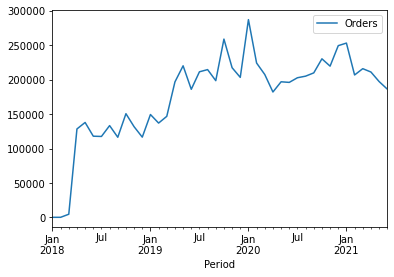

In [65]:
indexedDataset=pd.read_csv('C:/Users/120761/Documents/PyScripts/ova1.csv',parse_dates=['Period'],index_col=['Period'])
indexedDataset.plot()

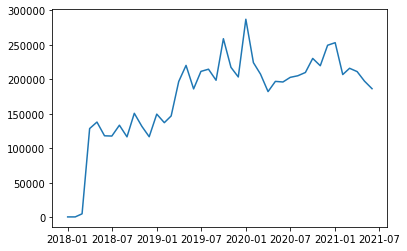

In [66]:
plt.plot(indexedDataset)

# SO the Data is not stationary..... To make it STATIONARY i'm using some Techniques like Rolling Stats,Differencing.....


In [67]:
#Rolling Stats Technique

rolmean=indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()

print(rolmean,rolstd)


                   Orders
Period                   
2018-01-01            NaN
2018-02-01            NaN
2018-03-01            NaN
2018-04-01            NaN
2018-05-01            NaN
2018-06-01            NaN
2018-07-01            NaN
2018-08-01            NaN
2018-09-01            NaN
2018-10-01            NaN
2018-11-01            NaN
2018-12-01   96260.666667
2019-01-01  108689.500000
2019-02-01  120081.916667
2019-03-01  131916.833333
2019-04-01  137605.166667
2019-05-01  144455.333333
2019-06-01  150124.833333
2019-07-01  157941.666667
2019-08-01  164713.333333
2019-09-01  171555.833333
2019-10-01  180575.333333
2019-11-01  187710.583333
2019-12-01  194937.666667
2020-01-01  206407.833333
2020-02-01  213666.833333
2020-03-01  218725.750000
2020-04-01  217504.916667
2020-05-01  215572.583333
2020-06-01  216409.000000
2020-07-01  215690.000000
2020-08-01  214897.083333
2020-09-01  215837.083333
2020-10-01  213453.000000
2020-11-01  213643.666667
2020-12-01  217477.666667
2021-01-01  

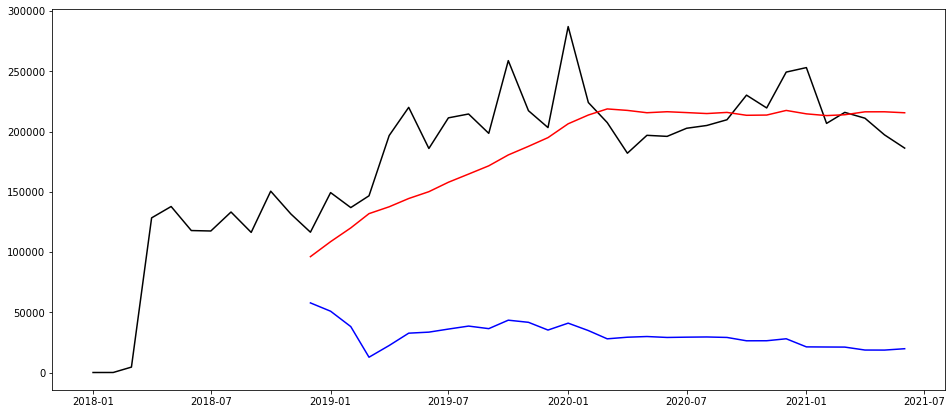

In [68]:
plt.figure(figsize=(16,7))
fig=plt.figure(1)
origin=plt.plot(indexedDataset,color='black',label='Original')
mean=plt.plot(rolmean,color='red',label='rollingmean')
std=plt.plot(rolstd,color='blue',label='rolstd')
plt.show()

In [69]:
#by seeing the above chart we can say that ,data with the Rolling mean & Rolling std is NOT STATIONARY. because the Mean & std
#is not constant .

#so we need to go with the next ADF test Technique 

In [70]:
from statsmodels.tsa.stattools import adfuller

In [71]:
adftest=adfuller(indexedDataset)
print('p-value',adftest[1])

p-value 0.2145094192017699


In [72]:
print('Test stats',adftest[0])

Test stats -2.1775089812669792


In [73]:
# in the above ADFuller test also we can conclude the data is not stationary , because the p-value is not less than 0.05

#going to find the next technique

In [74]:
#Determing the Log value of my IndexDataset

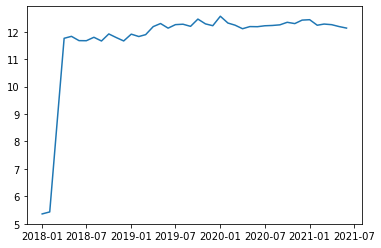

In [75]:
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

In [76]:
#Taking MovingAvg & Moving Std. for the Log dataset which we found in the above .

In [77]:
movingAverage=indexedDataset_logScale.rolling(window=12).mean()
movingstd=indexedDataset_logScale.rolling(window=12).std()

print(movingAverage,movingAverage)


               Orders
Period               
2018-01-01        NaN
2018-02-01        NaN
2018-03-01        NaN
2018-04-01        NaN
2018-05-01        NaN
2018-06-01        NaN
2018-07-01        NaN
2018-08-01        NaN
2018-09-01        NaN
2018-10-01        NaN
2018-11-01        NaN
2018-12-01  10.419011
2019-01-01  10.965471
2019-02-01  11.498632
2019-03-01  11.785550
2019-04-01  11.821075
2019-05-01  11.860055
2019-06-01  11.898017
2019-07-01  11.946913
2019-08-01  11.986587
2019-09-01  12.031080
2019-10-01  12.076225
2019-11-01  12.117980
2019-12-01  12.164339
2020-01-01  12.218767
2020-02-01  12.259794
2020-03-01  12.288651
2020-04-01  12.282200
2020-05-01  12.272920
2020-06-01  12.277301
2020-07-01  12.273827
2020-08-01  12.270046
2020-09-01  12.274653
2020-10-01  12.264889
2020-11-01  12.265762
2020-12-01  12.282766
2021-01-01  12.272257
2021-02-01  12.265556
2021-03-01  12.268883
2021-04-01  12.281208
2021-05-01  12.281374
2021-06-01  12.277128                Orders
Period    

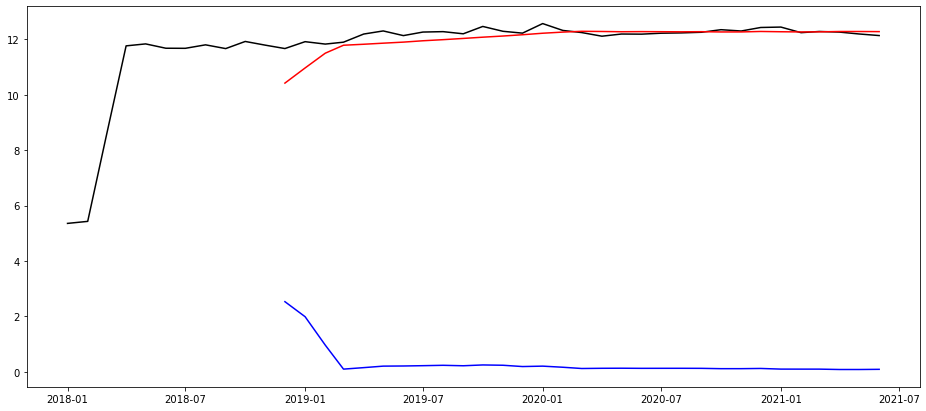

In [78]:
plt.figure(figsize=(16,7))
fig=plt.figure(1)
origin=plt.plot(indexedDataset_logScale,color='black',label='Original')
meanavg=plt.plot(movingAverage,color='red',label='rollingmean')
std=plt.plot(movingstd,color='blue',label='rolstd')
plt.show()

In [79]:
# now the above graph has come some little bit of Stationary , if we check the mean & variance at any two intervals
#it will be constant

#doing another differencing technique with Logscale value & movingaverage logscal value 

In [80]:
indexedDataset_logScaleMinusMovingAverage=indexedDataset_logScale - movingAverage
indexedDataset_logScaleMinusMovingAverage

#removing the Null values
indexedDataset_logScaleMinusMovingAverage.dropna(inplace=True)
indexedDataset_logScaleMinusMovingAverage.head(10)

,Orders
Period,
2018-12-01,1.246910
2019-01-01,0.948630
2019-02-01,0.328644
2019-03-01,0.110656
2019-04-01,0.368197
2019-05-01,0.441469
2019-06-01,0.235152
2019-07-01,0.314254
2019-08-01,0.289590


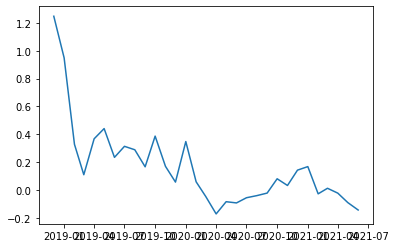

In [81]:
plt.plot(indexedDataset_logScaleMinusMovingAverage)

In [83]:
import warnings 
warnings.filterwarnings('ignore')

In [87]:
from statsmodels.tsa.stattools import adfuller




adftest=adfuller(indexedDataset_logScaleMinusMovingAverage)
print('p-value',adftest[1])

p-value 0.00021268578631864602


In [90]:
movingAveragex=indexedDataset_logScaleMinusMovingAverage.rolling(window=12).mean()
movingstdx=indexedDataset_logScaleMinusMovingAverage.rolling(window=12).std()


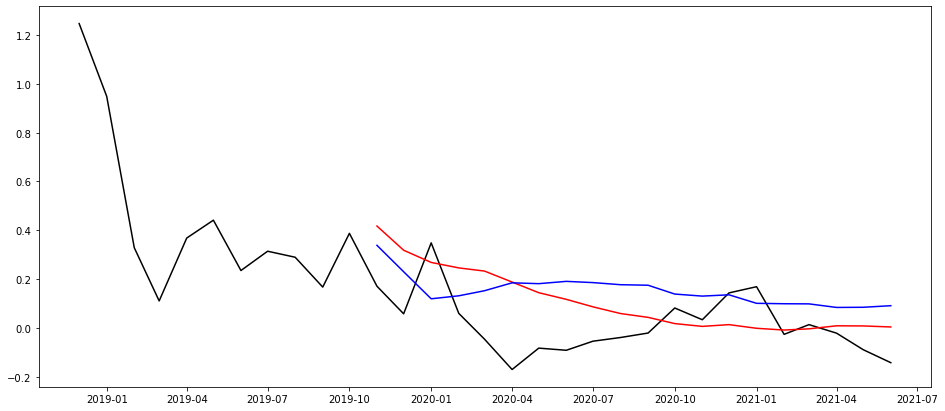

In [91]:
plt.figure(figsize=(16,7))
fig=plt.figure(1)
origin=plt.plot(indexedDataset_logScaleMinusMovingAverage,color='black',label='Original')
meanavg=plt.plot(movingAveragex,color='red',label='rollingmean')
std=plt.plot(movingstdx,color='blue',label='rolstd')
plt.show()

In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose

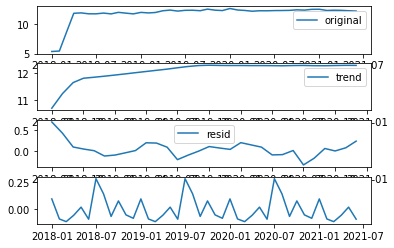

In [93]:
decomposition = seasonal_decompose(indexedDataset_logScale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale,label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(residual,label='resid')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(seasonal,label='seasonal')
plt.show()

In [ ]:
#shifting the Logdataset

In [96]:
datasetLogDiffShifting=indexedDataset_logScale-indexedDataset_logScale.shift()
datasetLogDiffShifting.dropna(inplace=True)
datasetLogDiffShifting

,Orders
Period,
2018-02-01,0.072759
2018-03-01,3.023842
2018-04-01,3.309780
2018-05-01,0.070801
2018-06-01,-0.156143
2018-07-01,-0.003211
2018-08-01,0.125673
2018-09-01,-0.135566
2018-10-01,0.257429


# ACF & PACF technique to go with ARIMA

In [94]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

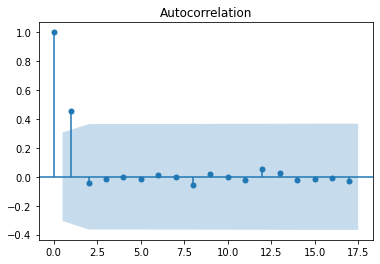

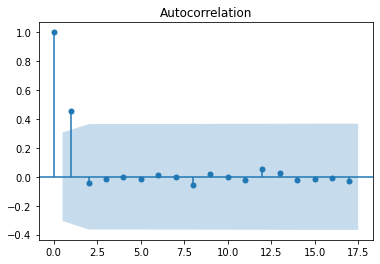

In [101]:
plot_acf(datasetLogDiffShifting)

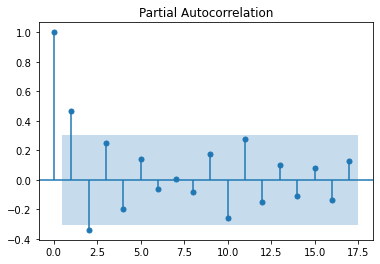

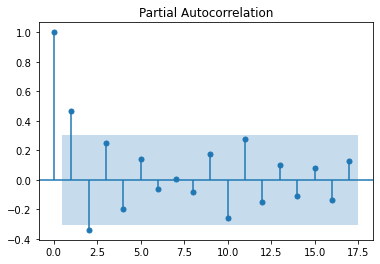

In [102]:
plot_pacf(datasetLogDiffShifting)

In [118]:
#lagging in ACF & PACF method

acf_lags=acf(datasetLogDiffShifting ,nlags=10)
pacf_lags=pacf(datasetLogDiffShifting ,nlags=10,method='ols')

Plotting AR model


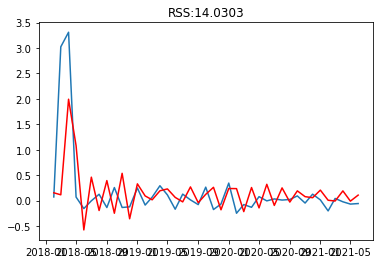

In [139]:
#AR model

from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(indexedDataset_logScale,order=(1,1,1))
results_AR=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS:%.4f' % sum((results_AR.fittedvalues-datasetLogDiffShifting['Orders'])**2))
print("Plotting AR model")


Plotting MA model


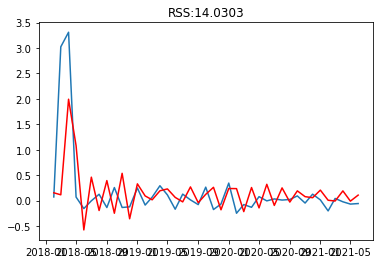

In [140]:
#MA model



model=ARIMA(indexedDataset_logScale,order=(2,1,0))
results_MA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS:%.4f' % sum((results_AR.fittedvalues-datasetLogDiffShifting['Orders'])**2))
print("Plotting MA model")



Plotting ARIMA model


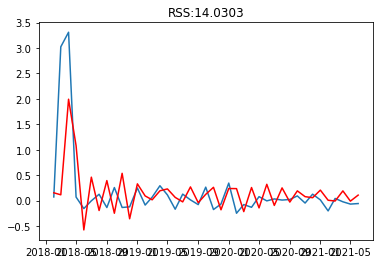

In [144]:
 #Fully Calculated ARIMA
    
model=ARIMA(indexedDataset_logScale,order=(3,1,1))
results_ARIMA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS:%.4f' % sum((results_AR.fittedvalues-datasetLogDiffShifting['Orders'])**2))
print("Plotting ARIMA model")


In [146]:
predictions_ARIMA_diff=pd.Series(results_AR.fittedvalues,copy=True)
predictions_ARIMA_diff.head()

Period
2018-02-01    0.154210
2018-03-01    0.114702
2018-04-01    1.993351
2018-05-01    1.082164
2018-06-01   -0.575327
dtype: float64

In [151]:
#converting to cumulativesum
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Period
2018-02-01    0.154210
2018-03-01    0.268911
2018-04-01    2.262262
2018-05-01    3.344426
2018-06-01    2.769099
dtype: float64


In [158]:
predictions_ARIMA_log=pd.Series(indexedDataset_logScale['Orders'],index=indexedDataset_logScale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Period
2018-01-01     5.356586
2018-02-01     5.583555
2018-03-01     8.722099
2018-04-01    14.025230
2018-05-01    15.178195
dtype: float64

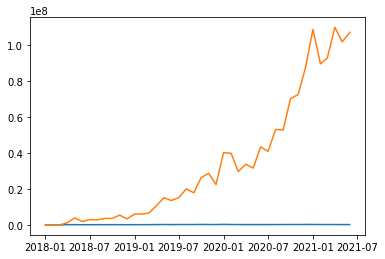

In [160]:
predictions_ARIMAA=np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMAA)

In [161]:
indexedDataset_logScale

,Orders
Period,
2018-01-01,5.356586
2018-02-01,5.429346
2018-03-01,8.453188
2018-04-01,11.762968
2018-05-01,11.833769
2018-06-01,11.677626
2018-07-01,11.674415
2018-08-01,11.800087
2018-09-01,11.664521


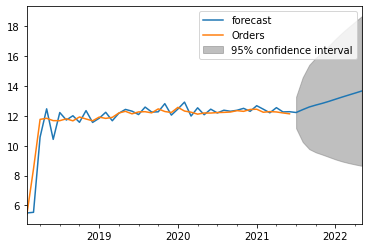

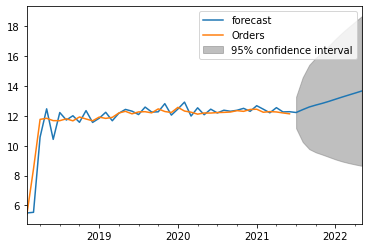

In [174]:
results_ARIMA.plot_predict(1,52)

In [175]:
print(results_ARIMA)

In [172]:
model=ARIMA(indexedDataset_logScale,order=(3,1,1))
results_ARIMA=model.fit(disp=-1)
full_pred=model

Plotting ARIMA model


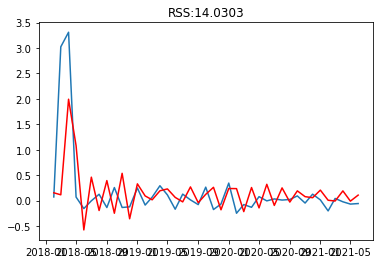

In [178]:
 #Fully Calculated ARIMA
    
model=ARIMA(indexedDataset_logScale,order=(3,1,1))
results_ARIMA=model.fit(disp=-1)
#final_forecast=results_ARIMA.predict(indexedDataset_logScale)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS:%.4f' % sum((results_AR.fittedvalues-datasetLogDiffShifting['Orders'])**2))
print("Plotting ARIMA model")
